## Task 6.1

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import random
random.seed(a=13)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
file_large = glob.glob('../Stocks/Large_Cap/*.csv')
file_large = random.sample( file_large, 10 )

file_small = glob.glob('../Stocks/Small_Cap/*.csv')
file_small = random.sample( file_small, 10 )

file_mid = glob.glob('../Stocks/Mid_Cap/*.csv')
file_mid = random.sample( file_mid, 10 )

In [3]:
final_files = []
final_files.extend(file_large)
final_files.extend(file_small)
final_files.extend(file_mid)

In [4]:
names = []

def pre_process(df):
    df = df[df.Series == 'EQ']
    names.append(df.Symbol.unique().tolist())
    df = df[['Date','Close Price']]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df.rename_axis(None, inplace=True)
    return df

In [5]:
final_df = pd.DataFrame()

for f in final_files:
    df = pd.read_csv(f)
    df = pre_process(df)
    final_df = pd.concat([final_df, df], axis=1)
    
column_names = [item for sublist in names for item in sublist]
final_df.columns = column_names

final_df    

,GAIL,HDFC,RELIANCE,SUNPHARMA,CIPLA,EICHERMOT,BPCL,M&M,MARUTI,LT,...,AMARAJABAT,EXIDEIND,JUBLFOOD,JINDALSTEL,BERGEPAINT,TATAPOWER,IDBI,DHFL,MINDTREE,SUNTV
2017-05-15,414.00,1559.50,1344.10,654.45,569.00,28930.60,727.85,1375.65,6823.90,1742.40,...,933.40,245.80,1025.45,114.20,259.5,83.55,75.05,431.40,509.45,912.20
2017-05-16,411.40,1566.55,1356.30,652.35,565.60,29362.50,733.30,1366.35,6953.95,1740.70,...,924.70,244.70,1050.65,114.10,261.5,83.85,76.65,424.45,511.30,894.70
2017-05-17,408.30,1552.50,1353.10,650.90,562.35,29093.55,727.45,1378.80,6958.20,1755.45,...,937.70,243.20,1049.05,116.40,260.9,85.35,75.95,429.00,506.35,887.05
2017-05-18,404.75,1537.05,1327.35,653.95,560.10,28357.30,714.90,1352.85,6831.05,1722.60,...,912.10,239.85,1019.35,113.30,254.1,83.75,69.95,417.95,492.90,871.35
2017-05-19,401.05,1520.60,1318.85,653.15,564.95,27936.05,702.45,1333.40,6790.55,1724.55,...,895.75,238.15,1018.10,112.15,247.8,84.15,68.75,404.20,497.50,852.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,340.75,1966.30,1343.50,448.20,557.95,20353.20,378.85,636.00,6702.00,1366.60,...,643.10,212.65,1282.25,169.30,304.7,64.35,37.25,116.60,979.95,551.10
2019-05-08,337.50,1930.75,1299.45,439.15,558.00,20336.55,379.80,621.65,6650.15,1360.35,...,636.00,208.35,1262.45,170.15,303.7,64.50,37.05,116.30,980.50,528.90
2019-05-09,340.40,1914.60,1256.45,439.35,557.75,20360.90,368.05,625.45,6624.95,1356.45,...,635.55,209.80,1268.80,163.05,302.3,64.40,37.45,116.00,980.45,540.70
2019-05-10,341.55,1931.70,1251.15,437.75,555.55,20354.00,362.95,628.75,6631.60,1355.50,...,634.90,210.20,1264.50,163.25,301.6,63.80,37.25,116.40,975.35,541.15


## Task 6.2

In [6]:
portfolio = pd.DataFrame()
portfolio['returns']    = final_df.pct_change().mean() * 252
portfolio['volatility'] = final_df.pct_change().std()  * np.sqrt(252)
portfolio

,returns,volatility
GAIL,-0.052551,0.338425
HDFC,0.137945,0.214557
RELIANCE,0.087318,0.439233
SUNPHARMA,-0.192912,0.348418
CIPLA,0.011817,0.254457
EICHERMOT,-0.176484,0.300184
BPCL,-0.261420,0.436424
M&M,-0.272401,0.440570
MARUTI,0.003937,0.225459
LT,-0.085904,0.314323


## Task 6.3

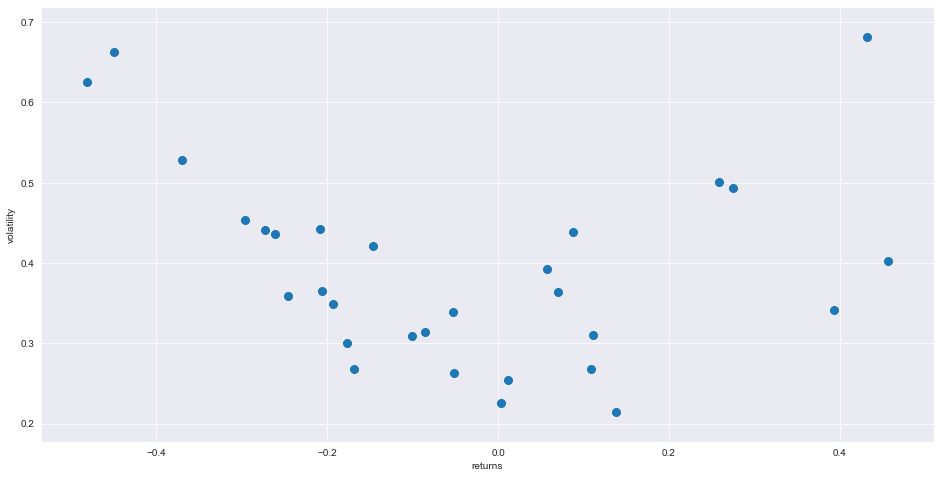

In [7]:
plt.figure(figsize=(16, 8))
sns.set_style('darkgrid')
sns.scatterplot(x='returns', y='volatility', data =portfolio, s=100);

In [8]:
X = np.array(portfolio[['returns','volatility']])
distortions = []
score = []

In [9]:
K = range(2,10)
for k in K:
    model = KMeans(n_clusters = k, random_state=7).fit(X)
    class_predictions = model.predict(X)
    distortions.append(model.inertia_)
    score.append(silhouette_score(X, class_predictions))
    

In [10]:
score

[0.46155358519270157,
 0.4670508591910598,
 0.4915195322520569,
 0.4385918471270232,
 0.449097938850837,
 0.4544953637188538,
 0.46054878436595686,
 0.47342589237750626]

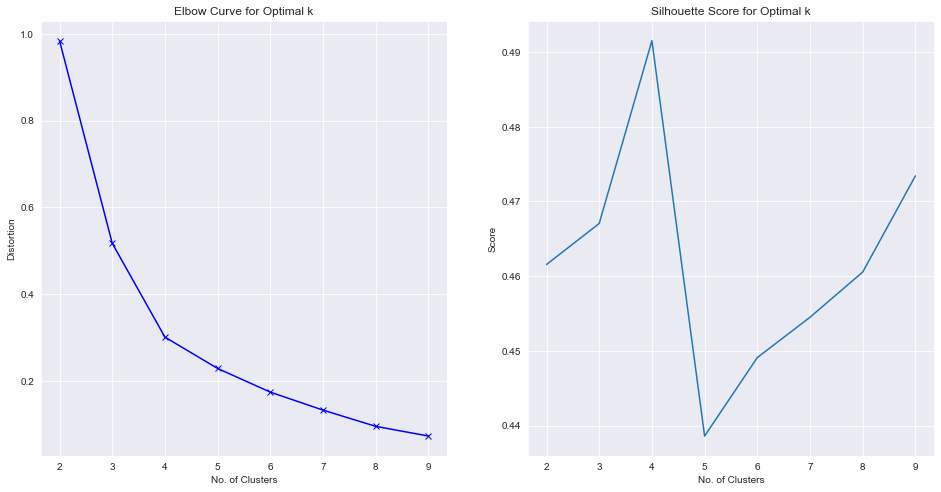

In [11]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(K, distortions, 'bx-')
axes[0].set_title('Elbow Curve for Optimal k')    
axes[0].set_xlabel('No. of Clusters')
axes[0].set_ylabel('Distortion')

axes[1].plot(K, score)
axes[1].set_title('Silhouette Score for Optimal k')    
axes[1].set_xlabel('No. of Clusters')
axes[1].set_ylabel('Score')

plt.show()

Now, both the methods - Elbow Curve method and Silhouette Score method suggests the optimal number of clusters as 4. So let's move further with optimal number of clusters as 4.

In [12]:
model = KMeans(n_clusters=4, random_state=7)
model.fit(portfolio)
portfolio['Cluster_Name']=model.predict(portfolio)

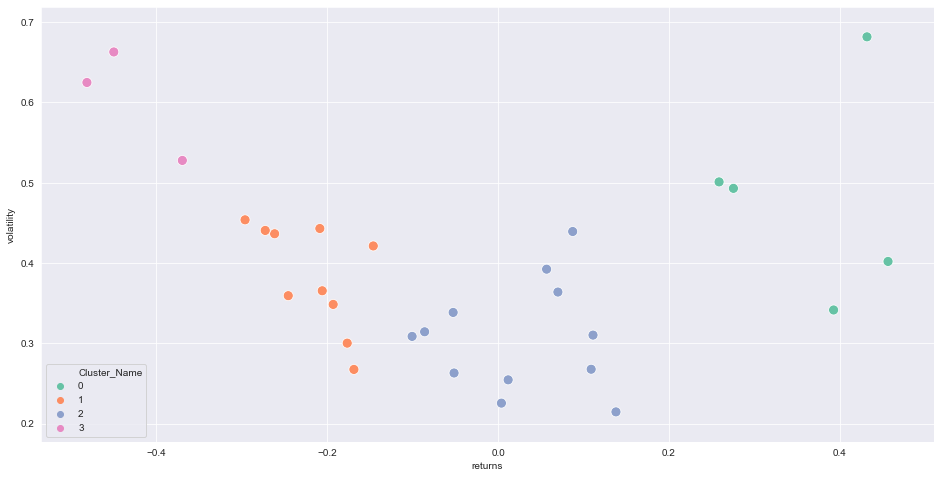

In [13]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'returns', y = 'volatility', hue = 'Cluster_Name', data = portfolio, palette="Set2", s=100)
plt.show()

## Task 6.4

In [14]:
cluster_0 = portfolio[portfolio.Cluster_Name == 0]
cluster_1 = portfolio[portfolio.Cluster_Name == 1]
cluster_2 = portfolio[portfolio.Cluster_Name == 2]
cluster_3 = portfolio[portfolio.Cluster_Name == 3]

In [15]:
print("Cluster 0: ")
print(cluster_0)
print("----------------------------------------------")
print("Cluster 1: ")
print(cluster_1)
print("----------------------------------------------")
print("Cluster 2: ")
print(cluster_2)
print("----------------------------------------------")
print("Cluster 3: ")
print(cluster_3)

Cluster 0: 
             returns  volatility  Cluster_Name
BOMDYEING   0.431635    0.681715             0
SONATSOFTW  0.456258    0.401937             0
JUBLFOOD    0.258587    0.501025             0
JINDALSTEL  0.275371    0.492980             0
MINDTREE    0.392570    0.341485             0
----------------------------------------------
Cluster 1: 
             returns  volatility  Cluster_Name
SUNPHARMA  -0.192912    0.348418             1
EICHERMOT  -0.176484    0.300184             1
BPCL       -0.261420    0.436424             1
M&M        -0.272401    0.440570             1
IDFC       -0.245479    0.359303             1
ASHOKA     -0.208509    0.442974             1
FORTIS     -0.145989    0.421250             1
AMARAJABAT -0.168654    0.267425             1
IDBI       -0.296008    0.453787             1
SUNTV      -0.205704    0.365414             1
----------------------------------------------
Cluster 2: 
             returns  volatility  Cluster_Name
GAIL       -0.052551    

In [16]:
returns = np.array(portfolio['returns'])
volatility = np.array(portfolio['volatility'])

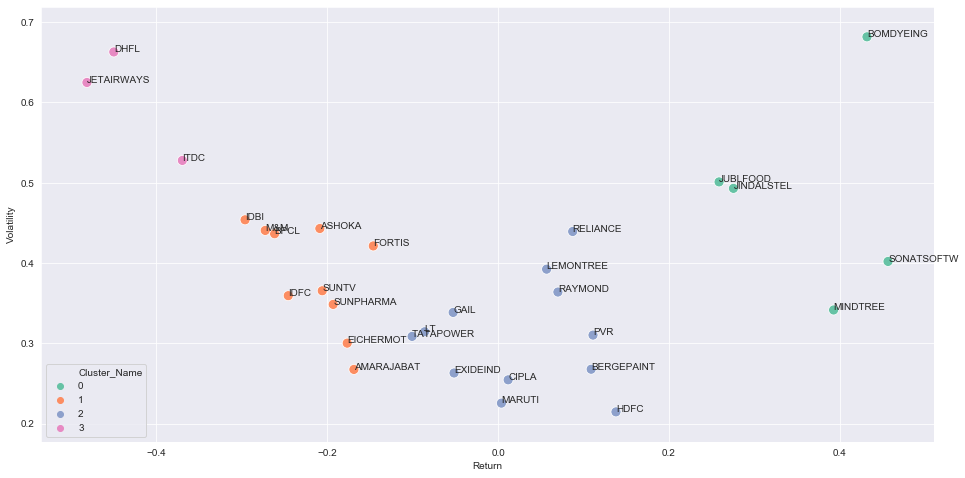

In [17]:
plt.figure(figsize=(16, 8))

sns.scatterplot(x = 'returns', y = 'volatility', hue = 'Cluster_Name', data = portfolio, palette="Set2", s=100)

for i,txt in enumerate(column_names):
    plt.annotate(txt, (returns[i], volatility[i]), size=10)
plt.xlabel('Return')
plt.ylabel('Volatility')
plt.legend();